In [6]:
# Standard Libraries
import os
import time


# Data Handling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Geospatial Libraries
import rasterio
import geopandas as gpd
from shapely.geometry import box, Polygon

# UP42 Library
import up42



### Data availability

In [34]:
# Authenticate
up42.authenticate(cfg_file="config.json")
# Initialize the catalog 
catalog = up42.initialize_catalog()

2023-11-24 09:10:04,282 - Got credentials from config file.
2023-11-24 09:10:05,451 - Authentication with UP42 successful!


In [35]:
# Load the AOI 
aoi_gdf = gpd.read_file('amazonas.geojson')  
aoi_geometry = aoi_gdf.geometry.__geo_interface__


In [36]:
# Check data availability 
search_parameters = catalog.construct_search_parameters(
    geometry=aoi_geometry,
    start_date="2018-11-07", 
    end_date="2018-12-31",
    collections=["sentinel-2"]  
)
search_results = catalog.search(search_parameters)
print("Search Results:", search_results)

2023-11-24 09:10:18,894 - Searching catalog with search_parameters: {'datetime': '2018-11-07T00:00:00Z/2018-12-31T23:59:59Z', 'intersects': {'type': 'Polygon', 'coordinates': (((-55.80602463366668, -13.267580954511516), (-55.80602463366668, -13.49938970772358), (-55.520612343249226, -13.49938970772358), (-55.520612343249226, -13.267580954511516), (-55.80602463366668, -13.267580954511516)),)}, 'limit': 10, 'collections': ['sentinel-2'], 'query': {}}
2023-11-24 09:10:22,052 - 6 results returned.


Search Results:                                             geometry  \
0  POLYGON ((-56.07910 -12.66242, -55.06828 -12.6...   
1  POLYGON ((-56.07910 -12.66242, -55.06828 -12.6...   
2  POLYGON ((-56.07910 -12.66242, -55.06828 -12.6...   
3  POLYGON ((-56.07910 -12.66242, -55.06828 -12.6...   
4  POLYGON ((-56.07910 -12.66242, -55.06828 -12.6...   
5  POLYGON ((-56.07910 -12.66242, -55.06828 -12.6...   

                         id constellation  collection     providerName  \
0  S2A_21LXF_20181228_0_L2A    sentinel-2  sentinel-2  earthsearch-aws   
1  S2B_21LXF_20181223_0_L2A    sentinel-2  sentinel-2  earthsearch-aws   
2  S2A_21LXF_20181218_0_L2A    sentinel-2  sentinel-2  earthsearch-aws   
3  S2B_21LXF_20181213_0_L2A    sentinel-2  sentinel-2  earthsearch-aws   
4  S2A_21LXF_20181118_0_L2A    sentinel-2  sentinel-2  earthsearch-aws   
5  S2B_21LXF_20181113_0_L2A    sentinel-2  sentinel-2  earthsearch-aws   

  up42:usageType                                 providerProperties  \
0

In [37]:
# Select the desired image 
selected_image = search_results.iloc[4]
image_id = selected_image["id"]
data_product_id = "c3de9ed8-f6e5-4bb5-a157-f6430ba756da"

# Order parameters
order_parameters = catalog.construct_order_parameters(
    data_product_id=data_product_id,
    image_id=image_id,
    aoi=aoi_geometry
)

# Estimate the order cost
estimate = catalog.estimate_order(order_parameters)
print("Estimated cost:", estimate)

# Place the order
order = catalog.place_order(order_parameters)
print("Order placed:", order)


2023-11-24 09:10:26,047 - See `catalog.get_data_product_schema(data_product_id)` for more detail on the parameter options.
2023-11-24 09:10:30,189 - Order is estimated to cost 0 UP42 credits (order_parameters: {'dataProduct': 'c3de9ed8-f6e5-4bb5-a157-f6430ba756da', 'params': {'id': 'S2A_21LXF_20181118_0_L2A', 'aoi': {'type': 'Polygon', 'coordinates': (((-55.80602463366668, -13.267580954511516), (-55.80602463366668, -13.49938970772358), (-55.520612343249226, -13.49938970772358), (-55.520612343249226, -13.267580954511516), (-55.80602463366668, -13.267580954511516)),)}}})


Estimated cost: 0


2023-11-24 09:10:34,100 - Order is PLACED
2023-11-24 09:10:34,101 - Order b9c1f610-6931-45e0-b333-51c68caaac9d is now PLACED.


Order placed: Order(order_id: b9c1f610-6931-45e0-b333-51c68caaac9d, assets: [], dataProvider: None, status: PLACED, createdAt: 2023-11-24T08:10:28.436499Z, updatedAt: 2023-11-24T08:10:28.436499Z)


In [38]:
# Check the status of the order 
while order.status != "FULFILLED":
    print("Order status:", order.status)
    time.sleep(60)  

# Retrieve the assets
assets = order.get_assets()
print("Assets:", assets)

# Aaccess the asset 
print(assets[0].info) 


2023-11-24 09:10:36,418 - Order is PLACED
2023-11-24 09:10:37,074 - Order is PLACED


Order status: PLACED


2023-11-24 09:11:37,581 - Order is BEING_FULFILLED
2023-11-24 09:11:38,063 - Order is BEING_FULFILLED


Order status: BEING_FULFILLED


2023-11-24 09:12:38,611 - Order is BEING_FULFILLED
2023-11-24 09:12:39,857 - Order is BEING_FULFILLED


Order status: BEING_FULFILLED


2023-11-24 09:13:40,355 - Order is BEING_FULFILLED
2023-11-24 09:13:40,859 - Order is BEING_FULFILLED


Order status: BEING_FULFILLED


2023-11-24 09:14:41,373 - Order is BEING_FULFILLED
2023-11-24 09:14:41,877 - Order is BEING_FULFILLED


Order status: BEING_FULFILLED


2023-11-24 09:15:42,399 - Order is FULFILLED
2023-11-24 09:15:44,879 - Order is FULFILLED


Assets: [Asset(name: earthsearch-aws_b9c1f610-6931-45e0-b333-51c68caaac9d.zip, asset_id: 7ee1a277-ff7c-482c-a05f-05dda42bdae4, createdAt: 2023-11-24T08:13:56.078472Z, size: 1446112733), contentType: application/zip]
{'id': '7ee1a277-ff7c-482c-a05f-05dda42bdae4', 'workspaceId': 'ebb55d65-524a-43a5-a312-b7b212a812d2', 'accountId': 'ebb55d65-524a-43a5-a312-b7b212a812d2', 'createdAt': '2023-11-24T08:13:56.078472Z', 'updatedAt': '2023-11-24T08:14:47.517677Z', 'name': 'earthsearch-aws_b9c1f610-6931-45e0-b333-51c68caaac9d.zip', 'size': 1446112733, 'contentType': 'application/zip', 'geospatialMetadataExtractionStatus': 'IN_PROGRESS', 'productId': 'c3de9ed8-f6e5-4bb5-a157-f6430ba756da', 'orderId': 'b9c1f610-6931-45e0-b333-51c68caaac9d', 'producerName': 'earthsearch-aws', 'collectionName': 'sentinel-2', 'tags': []}


In [39]:
# Download the asset 
asset = assets[0].download()

2023-11-24 09:16:27,800 - Downloading asset 7ee1a277-ff7c-482c-a05f-05dda42bdae4
2023-11-24 09:16:27,801 - Download directory: e:\work\UP42\project_0aff12d1-71c8-4bcb-9b3d-7dfd4a3b5fbe\asset_7ee1a277-ff7c-482c-a05f-05dda42bdae4
1412220it [02:27, 9574.14it/s] 
2023-11-24 09:18:59,098 - Download successful of 20 files to output_directory 'e:\work\UP42\project_0aff12d1-71c8-4bcb-9b3d-7dfd4a3b5fbe\asset_7ee1a277-ff7c-482c-a05f-05dda42bdae4': ['granule_metadata.xml', 'B03.tif', 'B02.tif', 'AOT.tif', 'B8A.tif', 'B04.tif', 'B05.tif', 'B08.tif', 'B06.tif', 'B12.tif', 'B07.tif', 'tileinfo_metadata.json', 'stac.geojson', 'SCL.tif', 'WVP.tif', 'B09.tif', 'thumbnail.jpg', 'B01.tif', 'TCI.tif', 'B11.tif']


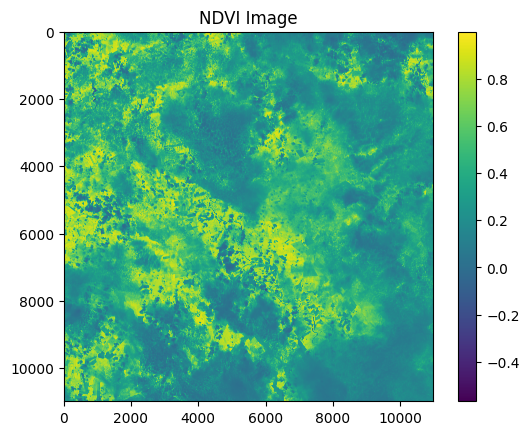

In [40]:
# NDVI process

# Find the directory 
def find_latest_directory(base_path, startswith_text):
    all_dirs = [os.path.join(base_path, d) for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
    project_dirs = [d for d in all_dirs if os.path.basename(d).startswith(startswith_text)]
    project_dirs.sort(key=lambda x: os.path.getmtime(x), reverse=True)
    return project_dirs[0] if project_dirs else None


base_path = 'E:\\work\\UP42'
project_directory = find_latest_directory(base_path, 'project_')
asset_directory = find_latest_directory(project_directory, 'asset_') if project_directory else None


if not asset_directory:
    raise FileNotFoundError("Could not find the latest asset directory.")

red_band_path = os.path.join(asset_directory, 'B04.tif')
nir_band_path = os.path.join(asset_directory, 'B08.tif')

if not os.path.exists(red_band_path) or not os.path.exists(nir_band_path):
    raise FileNotFoundError("Red band or NIR band file not found.")

with rasterio.open(red_band_path) as red_src, rasterio.open(nir_band_path) as nir_src:
    red = red_src.read(1).astype(float)
    nir = nir_src.read(1).astype(float)
    np.seterr(divide='ignore', invalid='ignore')
    ndvi = (nir - red) / (nir + red)

plt.imshow(ndvi, cmap='viridis')
plt.colorbar()
plt.title('NDVI Image')
plt.show()


### Use NDVI for the time series analysis

In [10]:
# Authenticate 
up42.authenticate(cfg_file="config.json")
catalog = up42.initialize_catalog()

# Load the specific AOI 
aoi_gdf = gpd.read_file('amazonas.geojson')
specific_aoi_polygon = aoi_gdf.loc[0, 'geometry']

minx, miny, maxx, maxy = specific_aoi_polygon.bounds
grid_width = (maxx - minx) / 100
grid_height = (maxy - miny) / 100
top_left_cell = box(minx, maxy - grid_height, minx + grid_width, maxy)
top_left_aoi_gdf = gpd.GeoDataFrame(geometry=[top_left_cell], crs=aoi_gdf.crs)
top_left_aoi_geometry = top_left_aoi_gdf.geometry.__geo_interface__

# Time range 
start_date = "2018-05-01"
end_date = "2018-07-31"
dates = pd.date_range(start=start_date, end=end_date, freq='MS')


download_base_dir = "E:\\work\\UP42\\data"

for single_date in dates:
    search_parameters = catalog.construct_search_parameters(
        geometry=top_left_aoi_geometry,
        start_date=single_date.strftime("%Y-%m-%d"),
        end_date=(single_date + pd.DateOffset(days=1)).strftime("%Y-%m-%d"),
        collections=["sentinel-2"]
    )
    search_results = catalog.search(search_parameters)

    if search_results.empty:
        print(f"No results found for date {single_date}")
        continue

    if 'cloudCoverage' not in search_results.columns:
        print("No 'cloudCoverage' field found in search results.")
        continue

    sorted_search_results = search_results.sort_values(by="cloudCoverage", ascending=True)
    selected_image = sorted_search_results.iloc[0]  # Image with the lowest cloud coverage is [4]
    image_id = selected_image["id"]
    data_product_id = "c3de9ed8-f6e5-4bb5-a157-f6430ba756da"

    order_parameters = catalog.construct_order_parameters(
        data_product_id=data_product_id,
        image_id=image_id,
        aoi=top_left_aoi_geometry
    )

    order = catalog.place_order(order_parameters)

    while order.status != "FULFILLED":
        print("Order status:", order.status)
        time.sleep(60)

    month_dir = os.path.join(download_base_dir, single_date.strftime('%Y%m'))
    os.makedirs(month_dir, exist_ok=True)

    assets = order.get_assets()
    for asset in assets:
        asset.download(output_directory=month_dir)

2023-11-24 10:12:04,067 - Got credentials from config file.
2023-11-24 10:12:05,228 - Authentication with UP42 successful!
2023-11-24 10:12:05,242 - Searching catalog with search_parameters: {'datetime': '2018-05-01T00:00:00Z/2018-05-02T23:59:59Z', 'intersects': {'type': 'Polygon', 'coordinates': (((-55.803170510762506, -13.269899042043637), (-55.803170510762506, -13.267580954511516), (-55.80602463366668, -13.267580954511516), (-55.80602463366668, -13.269899042043637), (-55.803170510762506, -13.269899042043637)),)}, 'limit': 10, 'collections': ['sentinel-2'], 'query': {}}
2023-11-24 10:12:07,356 - 1 results returned.
2023-11-24 10:12:07,357 - See `catalog.get_data_product_schema(data_product_id)` for more detail on the parameter options.
2023-11-24 10:12:11,915 - Order is PLACED
2023-11-24 10:12:11,916 - Order 9106379e-9845-4c2f-beac-643cc14a954f is now PLACED.
2023-11-24 10:12:12,433 - Order is PLACED
2023-11-24 10:12:12,929 - Order is PLACED


Order status: PLACED


2023-11-24 10:13:13,578 - Order is BEING_FULFILLED
2023-11-24 10:13:14,130 - Order is BEING_FULFILLED


Order status: BEING_FULFILLED


2023-11-24 10:14:14,714 - Order is BEING_FULFILLED
2023-11-24 10:14:15,262 - Order is BEING_FULFILLED


Order status: BEING_FULFILLED


2023-11-24 10:15:15,791 - Order is BEING_FULFILLED
2023-11-24 10:15:16,311 - Order is BEING_FULFILLED


Order status: BEING_FULFILLED


2023-11-24 10:16:16,809 - Order is FULFILLED
2023-11-24 10:16:17,306 - Order is FULFILLED
2023-11-24 10:16:18,315 - Downloading asset e502875a-31f2-4876-ba7d-1a11fd08b803
2023-11-24 10:16:18,317 - Download directory: E:\work\UP42\data\201805
1391621it [02:25, 9541.71it/s] 
2023-11-24 10:18:48,035 - Download successful of 20 files to output_directory 'E:\work\UP42\data\201805': ['granule_metadata.xml', 'B03.tif', 'B02.tif', 'AOT.tif', 'B8A.tif', 'B04.tif', 'B05.tif', 'B08.tif', 'B06.tif', 'B12.tif', 'B07.tif', 'tileinfo_metadata.json', 'stac.geojson', 'SCL.tif', 'WVP.tif', 'B09.tif', 'thumbnail.jpg', 'B01.tif', 'TCI.tif', 'B11.tif']
2023-11-24 10:18:48,040 - Searching catalog with search_parameters: {'datetime': '2018-06-01T00:00:00Z/2018-06-02T23:59:59Z', 'intersects': {'type': 'Polygon', 'coordinates': (((-55.803170510762506, -13.269899042043637), (-55.803170510762506, -13.267580954511516), (-55.80602463366668, -13.267580954511516), (-55.80602463366668, -13.269899042043637), (-55.8031

Order status: PLACED


2023-11-24 10:19:57,624 - Order is BEING_FULFILLED
2023-11-24 10:19:58,111 - Order is BEING_FULFILLED


Order status: BEING_FULFILLED


2023-11-24 10:20:58,609 - Order is BEING_FULFILLED
2023-11-24 10:20:59,100 - Order is BEING_FULFILLED


Order status: BEING_FULFILLED


2023-11-24 10:21:59,624 - Order is BEING_FULFILLED
2023-11-24 10:22:00,138 - Order is BEING_FULFILLED


Order status: BEING_FULFILLED


2023-11-24 10:23:00,663 - Order is FULFILLED
2023-11-24 10:23:01,186 - Order is FULFILLED
2023-11-24 10:23:02,177 - Downloading asset 92772095-633b-4938-bbe5-737238ee9453
2023-11-24 10:23:02,179 - Download directory: E:\work\UP42\data\201806
1316563it [02:16, 9677.92it/s] 
2023-11-24 10:25:21,896 - Download successful of 20 files to output_directory 'E:\work\UP42\data\201806': ['granule_metadata.xml', 'B03.tif', 'B02.tif', 'AOT.tif', 'B8A.tif', 'B04.tif', 'B05.tif', 'B08.tif', 'B06.tif', 'B12.tif', 'B07.tif', 'tileinfo_metadata.json', 'stac.geojson', 'SCL.tif', 'WVP.tif', 'B09.tif', 'thumbnail.jpg', 'B01.tif', 'TCI.tif', 'B11.tif']
2023-11-24 10:25:21,902 - Searching catalog with search_parameters: {'datetime': '2018-07-01T00:00:00Z/2018-07-02T23:59:59Z', 'intersects': {'type': 'Polygon', 'coordinates': (((-55.803170510762506, -13.269899042043637), (-55.803170510762506, -13.267580954511516), (-55.80602463366668, -13.267580954511516), (-55.80602463366668, -13.269899042043637), (-55.8031

Order status: PLACED


2023-11-24 10:26:35,398 - Order is BEING_FULFILLED
2023-11-24 10:26:35,905 - Order is BEING_FULFILLED


Order status: BEING_FULFILLED


2023-11-24 10:27:36,415 - Order is BEING_FULFILLED
2023-11-24 10:27:36,901 - Order is BEING_FULFILLED


Order status: BEING_FULFILLED


2023-11-24 10:28:37,402 - Order is BEING_FULFILLED
2023-11-24 10:28:37,913 - Order is BEING_FULFILLED


Order status: BEING_FULFILLED


2023-11-24 10:29:38,451 - Order is BEING_FULFILLED
2023-11-24 10:29:38,942 - Order is BEING_FULFILLED


Order status: BEING_FULFILLED


2023-11-24 10:30:41,468 - Order is FULFILLED
2023-11-24 10:30:42,042 - Order is FULFILLED
2023-11-24 10:30:43,081 - Downloading asset f3d32675-b99c-4c2a-a704-e1f0ffca6c9f
2023-11-24 10:30:43,082 - Download directory: E:\work\UP42\data\201807
1472334it [02:29, 9830.58it/s] 
2023-11-24 10:33:16,732 - Download successful of 20 files to output_directory 'E:\work\UP42\data\201807': ['granule_metadata.xml', 'B03.tif', 'B02.tif', 'AOT.tif', 'B8A.tif', 'B04.tif', 'B05.tif', 'B08.tif', 'B06.tif', 'B12.tif', 'B07.tif', 'tileinfo_metadata.json', 'stac.geojson', 'SCL.tif', 'WVP.tif', 'B09.tif', 'thumbnail.jpg', 'B01.tif', 'TCI.tif', 'B11.tif']
2023-11-24 10:33:16,737 - Searching catalog with search_parameters: {'datetime': '2018-08-01T00:00:00Z/2018-08-02T23:59:59Z', 'intersects': {'type': 'Polygon', 'coordinates': (((-55.803170510762506, -13.269899042043637), (-55.803170510762506, -13.267580954511516), (-55.80602463366668, -13.267580954511516), (-55.80602463366668, -13.269899042043637), (-55.8031

No results found for date 2018-08-01 00:00:00


NDVI for 2018-05-01 00:00:00: 0.7956970663597084
NDVI for 2018-06-01 00:00:00: 0.5091963085870704
NDVI for 2018-07-01 00:00:00: 0.48738169175133733


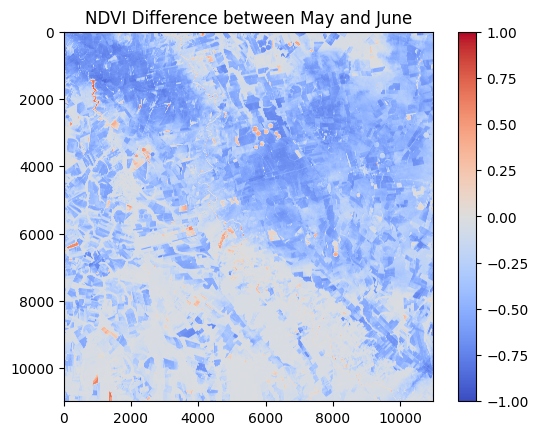

In [17]:
# NDVI time series analysis

def calculate_ndvi(nir_band, red_band):
    np.seterr(divide='ignore', invalid='ignore')
    return (nir_band - red_band) / (nir_band + red_band)

ndvi_results = pd.DataFrame(index=dates, columns=['NDVI'])

ndvi_may = None 
ndvi_june = None 

for single_date in dates:
    month_dir = os.path.join(download_base_dir, single_date.strftime('%Y%m'))
    
    red_band_path = os.path.join(month_dir, 'B04.tif')
    nir_band_path = os.path.join(month_dir, 'B08.tif')

    if os.path.exists(red_band_path) and os.path.exists(nir_band_path):
        with rasterio.open(red_band_path) as red_src, rasterio.open(nir_band_path) as nir_src:
            red = red_src.read(1).astype(float)
            nir = nir_src.read(1).astype(float)
            ndvi = calculate_ndvi(nir, red)
            
            if single_date.month == 5:
                ndvi_may = ndvi
            elif single_date.month == 6:
                ndvi_june = ndvi
            
            print(f"NDVI for {single_date}: {np.nanmean(ndvi)}")
    else:
        print(f"Files not found for date {single_date}: {red_band_path}, {nir_band_path}")


ndvi_diff_may_june = ndvi_june - ndvi_may
plt.imshow(ndvi_diff_may_june, cmap='coolwarm', vmin=-1, vmax=1)  
plt.colorbar()
plt.title('NDVI Difference between May and June')
plt.show()
